### Models and optimizers

### Pytorch nn.Module

The two main function we need to create are the __init__ and forward functions. We've already seen __init__ so lets looks at forward

The forward function is the only function that we MUST create when we build our class, Pytorch uses this function as the "entry point" to our model and is what is called when we do a forward pass of our model.

In [38]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt

In [39]:
class SimpleFunction(nn.Module):
    """Simple implementation of an nn.Module subclass
    Takes the input (x) and returns x * 4 + 2"""
    def __init__(self): # ใช้ในการ Define layers
        # Pass our class and self to superclass and call the superclass's init function
        super(SimpleFunction, self).__init__()

    def forward(self, x):
        return x * 4 + 2

In [40]:
simple_function = SimpleFunction()

In [41]:
output = simple_function(10)
output

42

### A more complicated model

In [42]:
class LinearModel(nn.Module):
    """
    Takes the input (x) and returns x * w^t + b
    """
    def __init__(self, input_size, output_size):
        # Pass our class and self to superclass and call the superclass's init function
        super(LinearModel, self).__init__()
        ## nn.Parameter wraps our normal tensors and "tells" Pytorch
        # that they are our nn.Module's model parameters to be optimized
        self.w = nn.Parameter(torch.randn(output_size, input_size))
        self.b = nn.Parameter(torch.randn(1, output_size))

    def forward(self, x):
        return torch.matmul(x, self.w.t() + self.b)

In [43]:
input_data = torch.randn(10,5)
input_data

tensor([[-1.2097,  0.5196, -0.2378, -0.0517,  1.5973],
        [-0.1118, -1.8659, -0.1027,  0.2325,  0.6108],
        [-0.7056, -1.5669, -0.1596, -0.9038,  0.9256],
        [ 0.8715, -1.8872,  0.4085,  0.9269,  1.2883],
        [ 0.4057,  0.8390,  1.2053, -0.1476,  1.4147],
        [ 0.9070, -0.5667, -0.8086, -2.1386,  0.4340],
        [ 0.1657,  1.1418,  1.5661,  0.0840, -0.5568],
        [ 1.0899,  0.2311,  0.7202,  0.6685,  0.7154],
        [-2.3890, -3.2819, -0.1884, -0.7350,  0.0994],
        [ 1.6804, -0.0073,  0.2522, -1.1785,  0.4862]])

In [44]:
linear_model = LinearModel(5, 1) # init w กับ b

output = linear_model(input_data)
print(output.shape)
print(output.detach())

torch.Size([10, 1])
tensor([[-1.5852],
        [-3.0473],
        [-5.2995],
        [-2.2840],
        [-0.9956],
        [-4.1923],
        [ 1.6478],
        [ 0.9948],
        [-7.6395],
        [-1.8449]])


In [45]:
x = torch.rand(3,2)
x

tensor([[0.0329, 0.8312],
        [0.4092, 0.3591],
        [0.2531, 0.2742]])

### Pytorch inbuilt Neural Network Layers

In [46]:
linear = nn.Linear(3, 1)

print('w:\n', linear.weight.data)

print('b:\n', linear.bias.data)

print('w shape:\n', linear.weight.data.shape)
print('b shape:\n', linear.bias.data.shape)

w:
 tensor([[-0.5242,  0.0480, -0.5371]])
b:
 tensor([0.0911])
w shape:
 torch.Size([1, 3])
b shape:
 torch.Size([1])


In [47]:
print('w shape:\n', linear.weight.grad)
print('b shape:\n', linear.bias.grad)

w shape:
 None
b shape:
 None


In [48]:
data = torch.randn(100,3)
target = data.sum(1, keepdims=True) + 0.01*torch.randn(data.shape[0],1)
print("Input data:\n", data[:10])
print("output data:\n", target[:10])

Input data:
 tensor([[-0.8275, -0.1003, -0.5424],
        [-0.0916, -1.5265, -0.7799],
        [-0.7216,  0.1163, -0.2867],
        [ 0.0982, -0.6951,  0.6080],
        [ 0.6381, -1.0706, -0.1409],
        [-0.7841, -1.4903, -1.2061],
        [-0.8609, -0.6140, -0.3200],
        [-0.3484, -0.3280,  0.2387],
        [-2.7435, -0.8617, -0.1064],
        [ 0.8914, -0.7229,  0.5269]])
output data:
 tensor([[-1.4687e+00],
        [-2.3976e+00],
        [-8.7434e-01],
        [ 1.7758e-03],
        [-5.7198e-01],
        [-3.4732e+00],
        [-1.7920e+00],
        [-4.4652e-01],
        [-3.7317e+00],
        [ 7.1254e-01]])


In [49]:
target_pred = linear(data)
print("Network output:\n", target_pred.data[:10])
print("Network output shape:", target_pred.shape)

Network output:
 tensor([[ 0.8114],
        [ 0.4847],
        [ 0.6289],
        [-0.3203],
        [-0.2191],
        [ 1.0784],
        [ 0.6848],
        [ 0.1297],
        [ 1.5451],
        [-0.6939]])
Network output shape: torch.Size([100, 1])


### Loss Function and Optimizers

Loss functions
we've already seen loss function's before and define our own, but using Pytorch we can pick from some pre-defined functions (we can also just create our own.)

Optimizers       
This is the object that will be doing the parameter updates for us! Pytorch has a number of different optimizers, some of which we will explore in future labs. For now we will just use our well known Gradient Descent (GD) optimizer.     
Note : Most optimizers are just some varient of GD

In [50]:
# Lets perform a regression with a mean squere error loss
loss_function = nn.MSELoss()

# Lets create a stochastic gradient descent optimizer with a learning rate of 0.01 
# (the way we will be using it, it is just normal GD)
# When we create the optimizer we need to tell it WHAT it needs to optimize, so the first thing
# We pass it are the linear layer's "parameters"
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

Text(0, 0.5, 'Outputs')

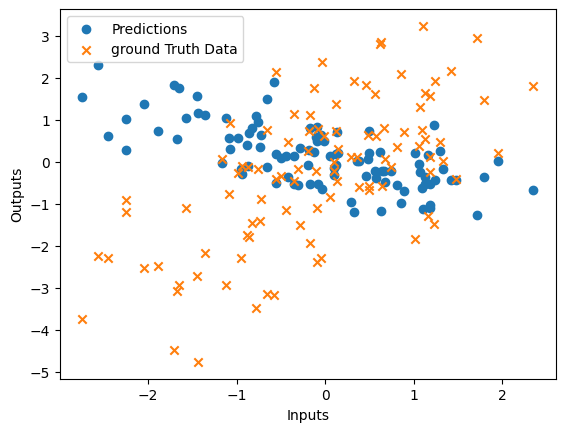

In [51]:
# Plotting the first dimension of the input vs the output

# Use the outputs of the model from a few cells ago
plt.scatter(data[:, 0], target_pred.detach())
# Use the Ground Truth data
plt.scatter(data[:, 0], target, marker='x')
plt.legend(["Predictions", "ground Truth Data"])
plt.xlabel("Inputs")
plt.ylabel("Outputs")

In [52]:
loss = loss_function(target_pred, target)
print('loss:', loss.item())

loss: 5.6202545166015625


In [53]:
# Backward pass
loss.backward()

print("dL/dw: ", linear.weight.grad)
print('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[-3.4869, -1.8803, -2.6386]])
dL/db:  tensor([0.8836])


In [54]:
# he critical step to update the parameter which reduce the loss
optimizer.step()

# Perform another forward pass of the model to check the new loss
target_pred = linear(data)
loss = loss_function(target_pred, target)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  5.3884172439575195


### The Training Loop

In [55]:
loss_logger = []

for i in range(1000):
    # Perform a forward pass of our data
    target_pred = linear(data)

    # Calculate the loss
    loss = loss_function(target_pred, target)

    # .zero_grad sets the stored gradients to 0
    # If we didn't do this they would be added to the
    # Gradients from the previous step!
    optimizer.zero_grad()

    # Perform an optimization step!
    optimizer.step()

    loss_logger.append(loss.item())

print("loss:", loss.item())

loss: 5.3884172439575195
